In [23]:
# thresolding is used when we want image in black and white as binary value gives more information. It actually increases
# contrast of image and makes color above a particular value as black and below that particular value as zero.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('data/rainbow.jpg')

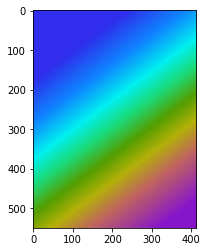

In [6]:
plt.imshow(img)

In [7]:
img.max()

255

In [8]:
img.min()

0

In [9]:
np.median(img)

127.0

In [41]:
img = cv2.imread('data/rainbow.jpg')

ret = 126.0


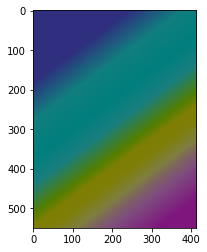

In [43]:
# genreally a start point for thresold is median value
# ret, thresoldimg = cv2.threshold(src=img, thresh=126, maxval=255, type=cv2.THRESH_BINARY)
# ret, thresoldimg = cv2.threshold(src=img, thresh=126, maxval=255, type=cv2.THRESH_BINARY_INV)
ret, thresoldimg = cv2.threshold(src=img, thresh=126, maxval=255, type=cv2.THRESH_TRUNC)
print('ret =', ret)
plt.imshow(thresoldimg, cmap = 'gray')

In [44]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret = 113.0


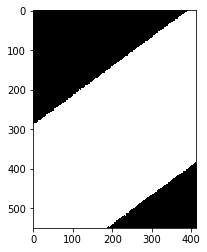

In [47]:
ret, thresoldimg = cv2.threshold(src=img, thresh=134, maxval=255, type=cv2.THRESH_OTSU)
print('ret =', ret)
plt.imshow(thresoldimg, cmap = 'gray')

In [48]:
# cv2.THRESH_OTSU and cv2.THRESH_TRIANGLE takes only single channel image i.e black and white image

In [ ]:
img = cv2.imread('data/crossword.jpg')

In [60]:
def imshow(image = img, cmap="gray"):
    plt.figure(figsize=[15, 15])
    plt.subplot(1,1,1)
    plt.imshow(image, cmap)

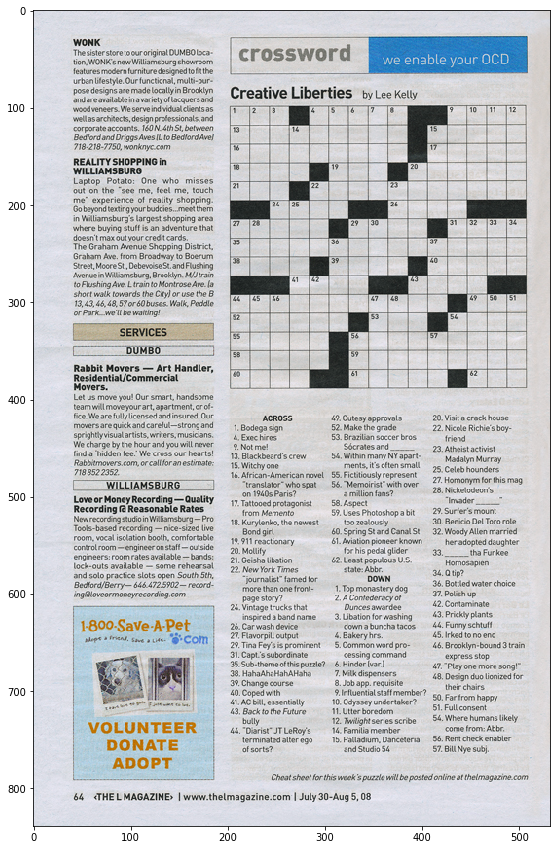

In [55]:
imshow()

In [ ]:
# cv2.thresold have thresold value may not be good in all the conditions where image has different lighting conditions in 
# different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small 
# regions of the image. So we get different thresholds for different regions of the same image and it gives us better results
# for images with varying illumination.

# Parameters for adaptive thresold
# adaptive thresold require single channel image
# maxValue : the non-zero value assigned to the pixels for which the condition is satisfied
# adaptiveMethod : cv.ADAPTIVE_THRESH_MEAN_C or cv.ADAPTIVE_THRESH_GAUSSIAN_C
# hresholding type that must be either cv.THRESH_BINARY or cv.THRESH_BINARY_INV
# size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on. i.e odd numbers
# C : constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or 
#     negative as well.

In [57]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

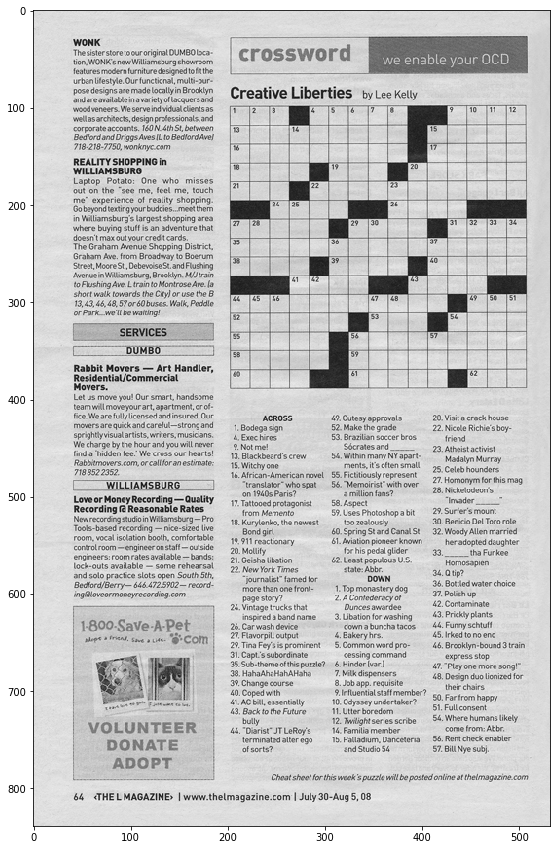

In [61]:
imshow(img)

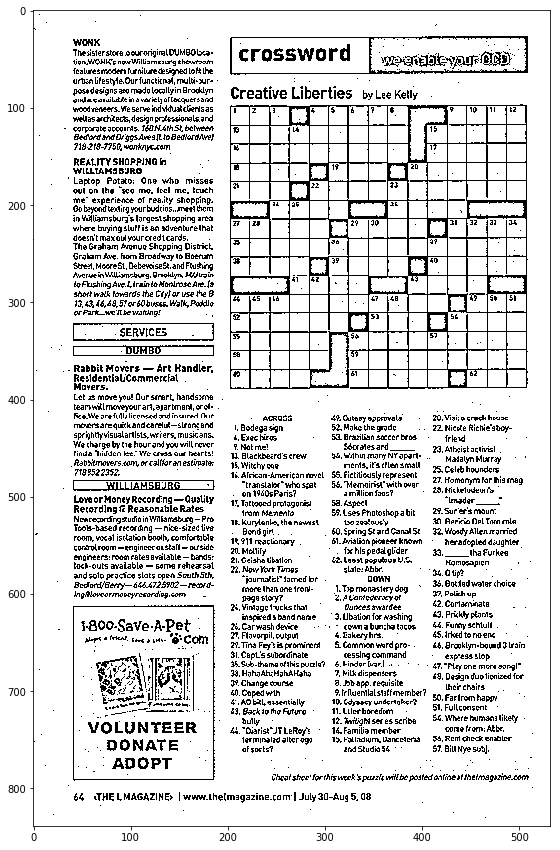

In [107]:
adap1 = cv2.adaptiveThreshold(src=img, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                             thresholdType=cv2.THRESH_BINARY,blockSize=11, C=11)
imshow(adap1)

In [118]:
# C removed noise from the image i.e useless black color
# BLACK SHOULD BE only important information
# high block size means grab more color from the source image to the adapted image

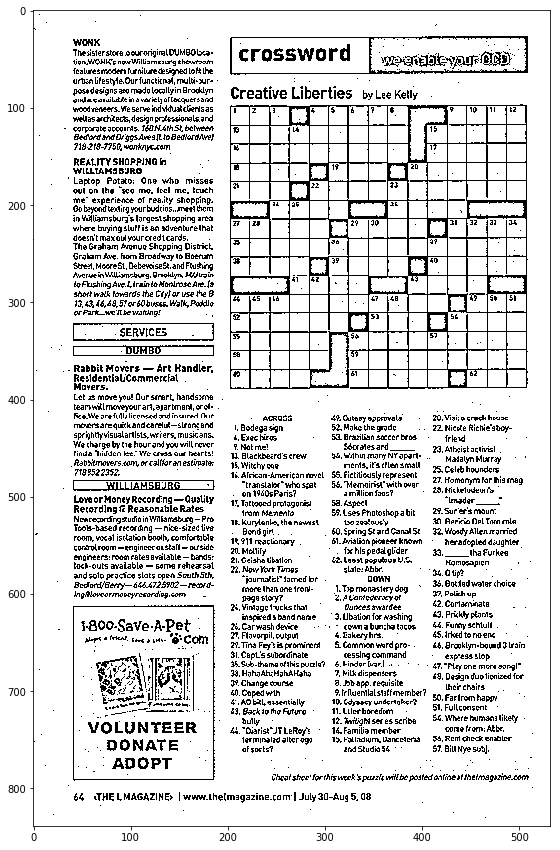

In [143]:
adap2 = cv2.adaptiveThreshold(src=img, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                             thresholdType=cv2.THRESH_BINARY,blockSize=11, C=11)
imshow(adap2)

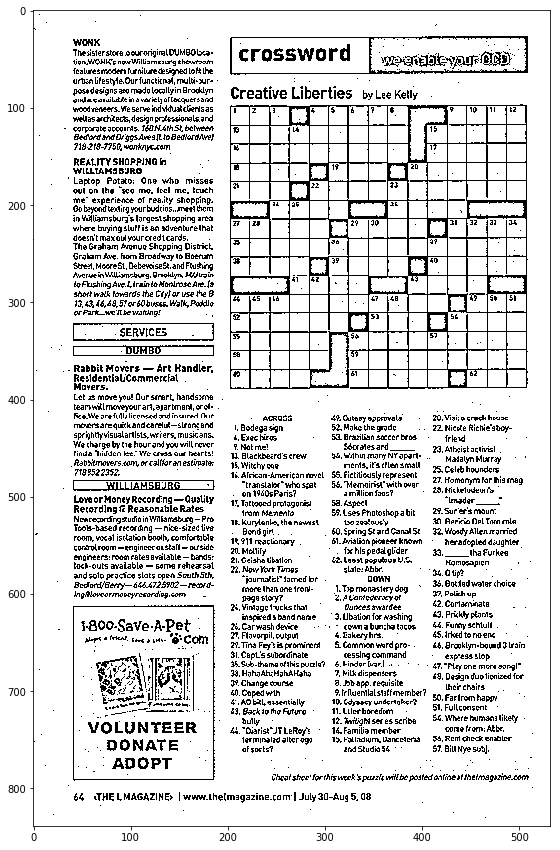

In [136]:
blended = cv2.addWeighted(adap1, 0.2, adap2, 0.5, 4)
imshow(blended)

In [138]:
# our aim is to convert any image in grayscale to binary either white and black